In [51]:
import numpy as np
import pandas as pd
import cartopy_grid_plots as cgp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utilities import font_properties as fp
from matplotlib.patches import Polygon
import xarray as xr

To download the information into the data folder

In [45]:
# !wget -c https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt -P ../data/

The Oceanic Niño Index (ONI) dataset from NOAA’s Climate Prediction Center provides three-month running mean sea surface temperature (SST) anomalies in the Niño 3.4 region (5°N-5°S, 120°W-170°W). This dataset is commonly used to monitor **El Niño** and **La Niña** events.

**Interpretation:**
* **El Niño:** ONI ≥ +0.5°C for five consecutive overlapping seasons.
* **La Niña:** ONI ≤ -0.5°C for five consecutive overlapping seasons.
* **Neutral:** ONI between -0.5°C and +0.5°C.


In [46]:
enso_data = '../data/oni.ascii.txt'

df_enso = pd.read_csv(enso_data, delimiter='  ',
                      engine='python', skiprows=1, header=None,
                      skipinitialspace=True, names=['season', 'value', 'anomaly'])

dates_expanded = df_enso['season'].str.split(" ", expand=True,)
season_month = {'DJF': 1, 'JFM': 2, 'FMA': 3, 'MAM': 4, 'AMJ': 5, 'MJJ': 6,
             'JJA': 7, 'JAS': 8, 'ASO': 9, 'SON': 10, 'OND': 11, 'NDJ': 12}

dates = pd.date_range('{0}-{1}-01'.format
                       (dates_expanded.iloc[0, 1],
                        season_month[dates_expanded.iloc[0, 0]]),
                       '{0}-{1}-01'.format(dates_expanded.iloc[-1, 1],
                                           season_month[
                           dates_expanded.iloc[-1, 0]]),
                       freq='MS')
df_enso['date'] = dates
df_enso

,season,value,anomaly,date
0,DJF 1950,24.72,-1.53,1950-01-01
1,JFM 1950,25.17,-1.34,1950-02-01
2,FMA 1950,25.75,-1.16,1950-03-01
3,MAM 1950,26.12,-1.18,1950-04-01
4,AMJ 1950,26.32,-1.07,1950-05-01
...,...,...,...,...
896,ASO 2024,26.55,-0.21,2024-09-01
897,SON 2024,26.45,-0.26,2024-10-01
898,OND 2024,26.30,-0.37,2024-11-01
899,NDJ 2024,26.09,-0.53,2024-12-01


In [47]:
df_enso.to_csv('../data/oni.csv', index=False)

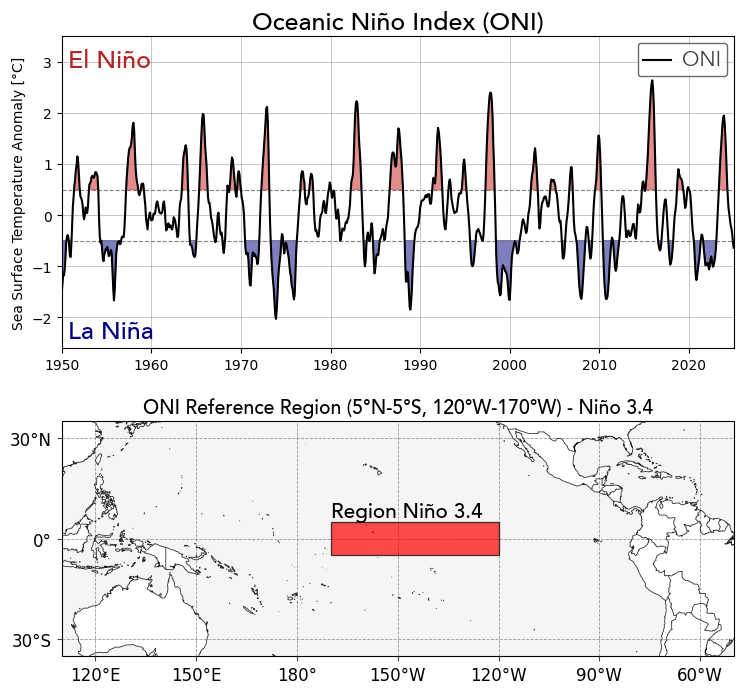

In [48]:
proptitle, propticks, proplatlon, proplegend, proptitlebar = fp()

num_rows = 2
num_columns = 1

# Use the function to calculate properties of the grid
grid_prop = x_coords, y_coords, x_fig, y_fig = cgp.define_grid_fig(
    num_rows, num_columns)

threshold = 0.5
color_pos = '#C91A1A'
color_neg = 'navy'
y_max = 4.8
y_min = -2.5

fig = plt.figure(figsize=(7, 7))

ax = fig.add_axes([x_coords[0], y_coords[0],
                   x_fig, y_fig])


plt.axhline(threshold, ls='--', color='gray', lw=0.8)
plt.axhline(-threshold, ls='--', color='gray', lw=0.8)


plt.fill_between(df_enso['date'], threshold, df_enso['anomaly'],
                 df_enso['anomaly'] > threshold,
                 color=color_pos, lw=0.8, alpha=0.5, interpolate=True)
plt.fill_between(df_enso['date'], -threshold, df_enso['anomaly'],
                 df_enso['anomaly'] < (-threshold),
                 color=color_neg, lw=0.8, alpha=0.5, interpolate=True)
plt.plot(df_enso['date'], df_enso['anomaly'], color='k', lw=1.5, label='ONI')
plt.grid(which='major', linewidth='0.4', color='gray', alpha=0.8)

plt.grid(which='major', linewidth='0.4', color='gray', alpha=0.8)
plt.xlim(df_enso['date'].iloc[0], df_enso['date'].iloc[-1])
plt.ylim(-2.6, 3.5)


L = plt.legend(loc='upper right', fancybox=True, frameon=True,
               edgecolor='#434343', ncol=2)
plt.setp(L.texts, fontproperties=proplegend, fontsize=15,
         color='#434343')

plt.text(0.01, 0.9, 'El Niño', transform=ax.transAxes, ha='left',
         fontproperties=proptitle, fontsize=18, color='firebrick')

plt.text(0.01, 0.03, 'La Niña', transform=ax.transAxes, ha='left',
         fontproperties=proptitle, fontsize=18, color='Navy')


ax.set_title('Oceanic Niño Index (ONI)', fontproperties=proptitle,
             fontsize=18)
y_label = 'Sea Surface Temperature Anomaly [°C]'
plt.ylabel(y_label)

proj = ccrs.PlateCarree(central_longitude=180)
ax = fig.add_axes([x_coords[0], y_coords[1],
                   x_fig, y_fig],
                  projection=proj)
ax = cgp.continentes_lon_lat(ax, lon_step=30, lat_step=30,
                             map_resolution=50)

extent = [110, 360-50, -35, 35]
ax.set_extent(extent, crs=ccrs.PlateCarree())
Nino_34_x = [360-170, 360-120, 360-120, 360-170, 360-170]
Nino_34_y = [-5, -5, 5, 5, -5]

Nino_34_coords = np.column_stack((Nino_34_x, Nino_34_y))
polygon = Polygon(Nino_34_coords, closed=True, edgecolor='k',
                  facecolor='r', lw=0.95, alpha = 0.7,
                  transform=ccrs.PlateCarree(),
                  zorder=10)
ax.add_patch(polygon)


ax.set_title('ONI Reference Region (5°N-5°S, 120°W-170°W) - Niño 3.4',
             fontproperties=proptitle, fontsize=14)

ax.text(190, 6.5, 'Region Niño 3.4', transform=ccrs.PlateCarree(),
        fontproperties=proptitle, fontsize=15)


path_fig = '../figures/'
name_fig = 'oni_index'

fig.savefig(f'{path_fig}{name_fig}.png',
            dpi=200, bbox_inches='tight',
            transparent=False, facecolor='white')

## NOAA OI SST V2 High Resolution Dataset
NOAA High-resolution Blended Analysis of Daily SST and Ice. Data is from Sep 1981 and is on a 1/4 ° global grid.[Link](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html)


In [80]:
# !wget -c https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc ../data/

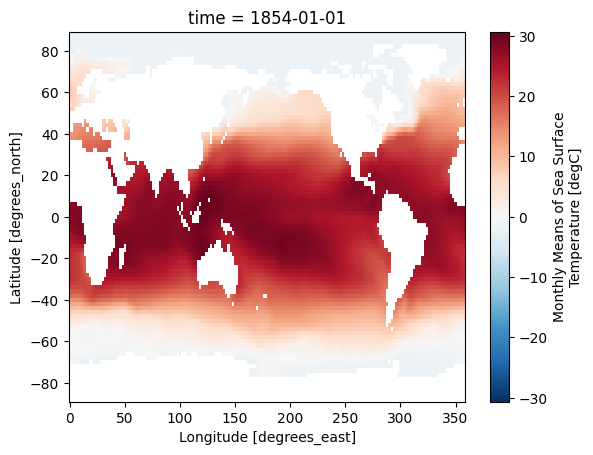

In [82]:
ds = xr.open_dataset('../data/sst.mnmean.v4.nc')
ds['sst'][0].plot()


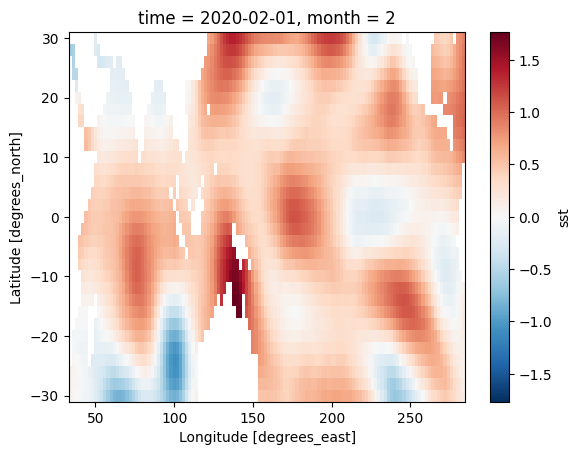

In [88]:
date_min = pd.to_datetime('1960-01-01')

ds_dates= pd.to_datetime(ds.time.values)
id_dates = np.where(ds_dates >= date_min)[0]
ds_dates = ds_dates[id_dates]
ds = ds.isel(time=id_dates)


ds = ds.sel(lat=slice(30, -30),
                    lon=slice(34, 285))

# Extract the sea surface temperature (SST) variable
sst = ds['sst']

# Calculate the climatology (mean for each month over the period)
climatology = sst.groupby('time.month').mean('time')


# Compute the anomalies by subtracting the climatology
sst_anomalies = sst.groupby('time.month') - climatology

sst_anomalies[-1].plot()

In [84]:
import eof_module

val_prop, vec_prop, eof, var_exp = eof_module.compute_eof(sst_anomalies.values)

/home/jdmantillaq/Documents/ENSOconomics/code/eof_module.py:69: ComplexWarning: Casting complex values to real discards the imaginary part
  eof_con_NaN[:, Not_Nan] = eof


In [85]:
val_prop.shape

(722,)

In [86]:
vec_prop.shape

(722, 722)

/home/jdmantillaq/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jdmantillaq/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


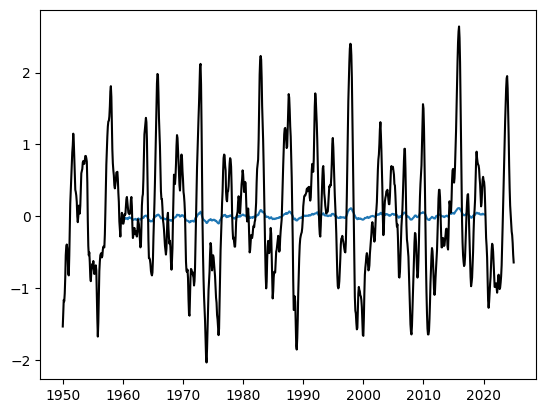

In [90]:
plt.plot(ds_dates, vec_prop[:, 0])
plt.plot(df_enso['date'], df_enso['anomaly'], color='k', lw=1.5, label='ONI')

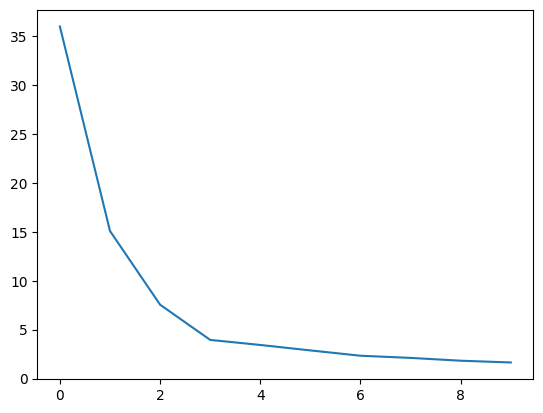

In [72]:
plt.plot(var_exp[:10])